# Predicting Ad Engagement
* In this project we will be working with a advertising data set, indicating whether or not a particular internet user clicked on an Advertisement.
* We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

**This dataset contains the following features:**

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.dpi'] = 150  #setting dpi to 150

## Data:


In [198]:
ad_data = pd.read_csv('advertising.csv')

In [199]:
ad_data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [200]:
ad_data.info()

#no null values...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [201]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

**Age Wise Count of Potential Customers:**

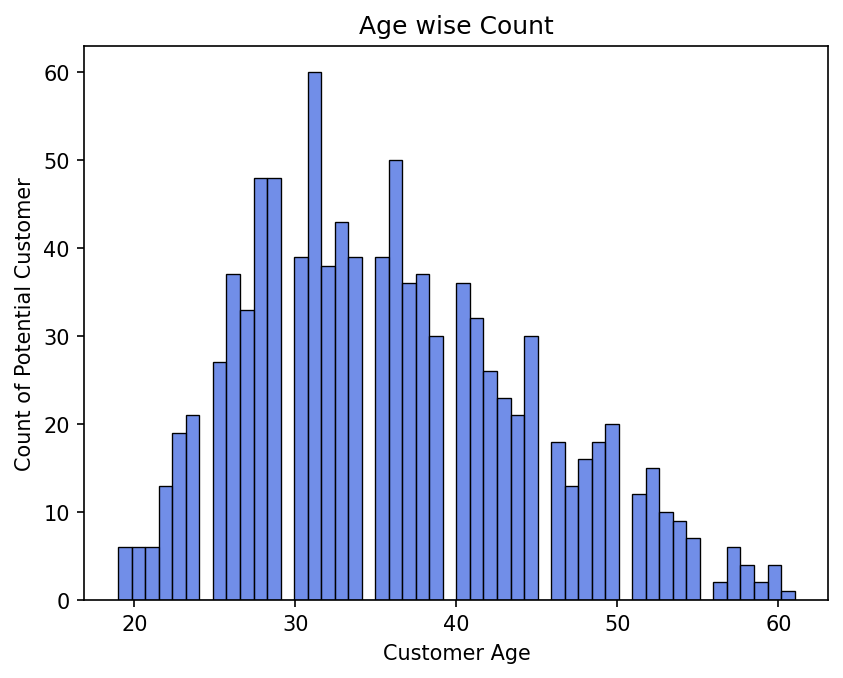

In [204]:
sns.histplot(x = 'Age', data = ad_data, bins = 50, color = 'royalblue')
plt.xlabel('Customer Age')
plt.ylabel('Count of Potential Customer')
plt.title('Age wise Count')

plt.show()

**Jointplot showing Area Income versus Age:**

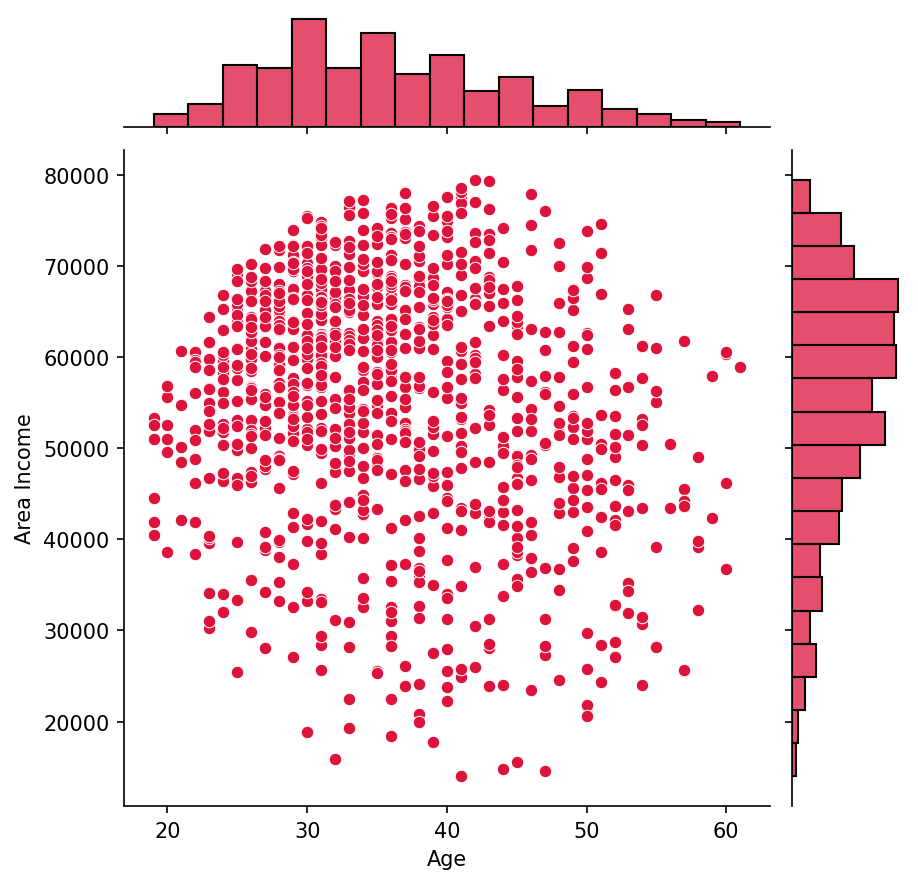

In [206]:
sns.jointplot(x = 'Age', y = 'Area Income' , data = ad_data, color = 'crimson')

plt.show()

**Jointplot showing the kde distributions of Daily Time spent on site vs. Age:**

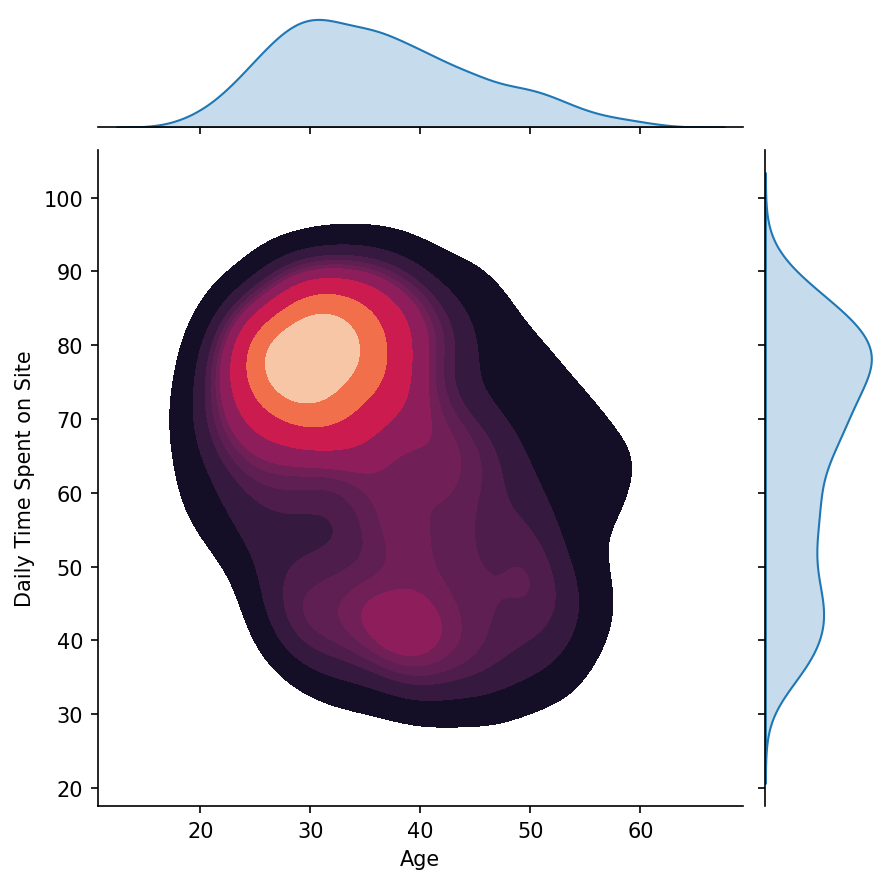

In [208]:
sns.jointplot(kind = 'kde', fill = True, x = 'Age', y = 'Daily Time Spent on Site', data = ad_data, cmap = 'rocket')

plt.show()

**Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage':**

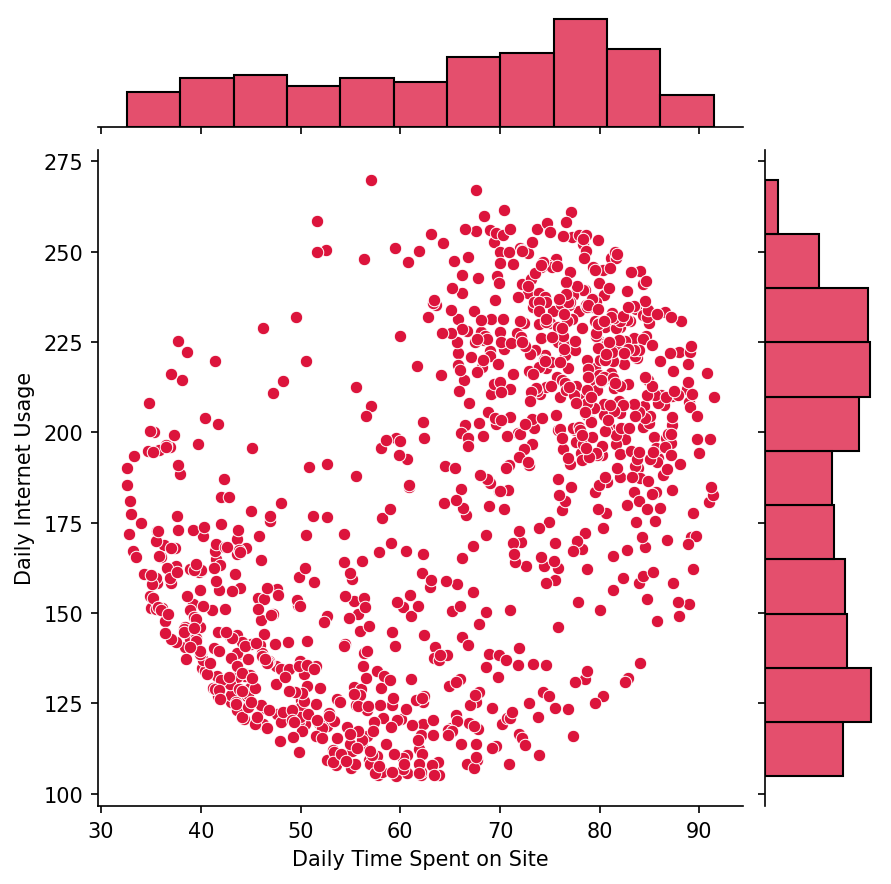

In [210]:
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = ad_data, color = 'crimson' )

plt.show()

**Pairplot with the hue defined by the 'Clicked on Ad' column feature:**

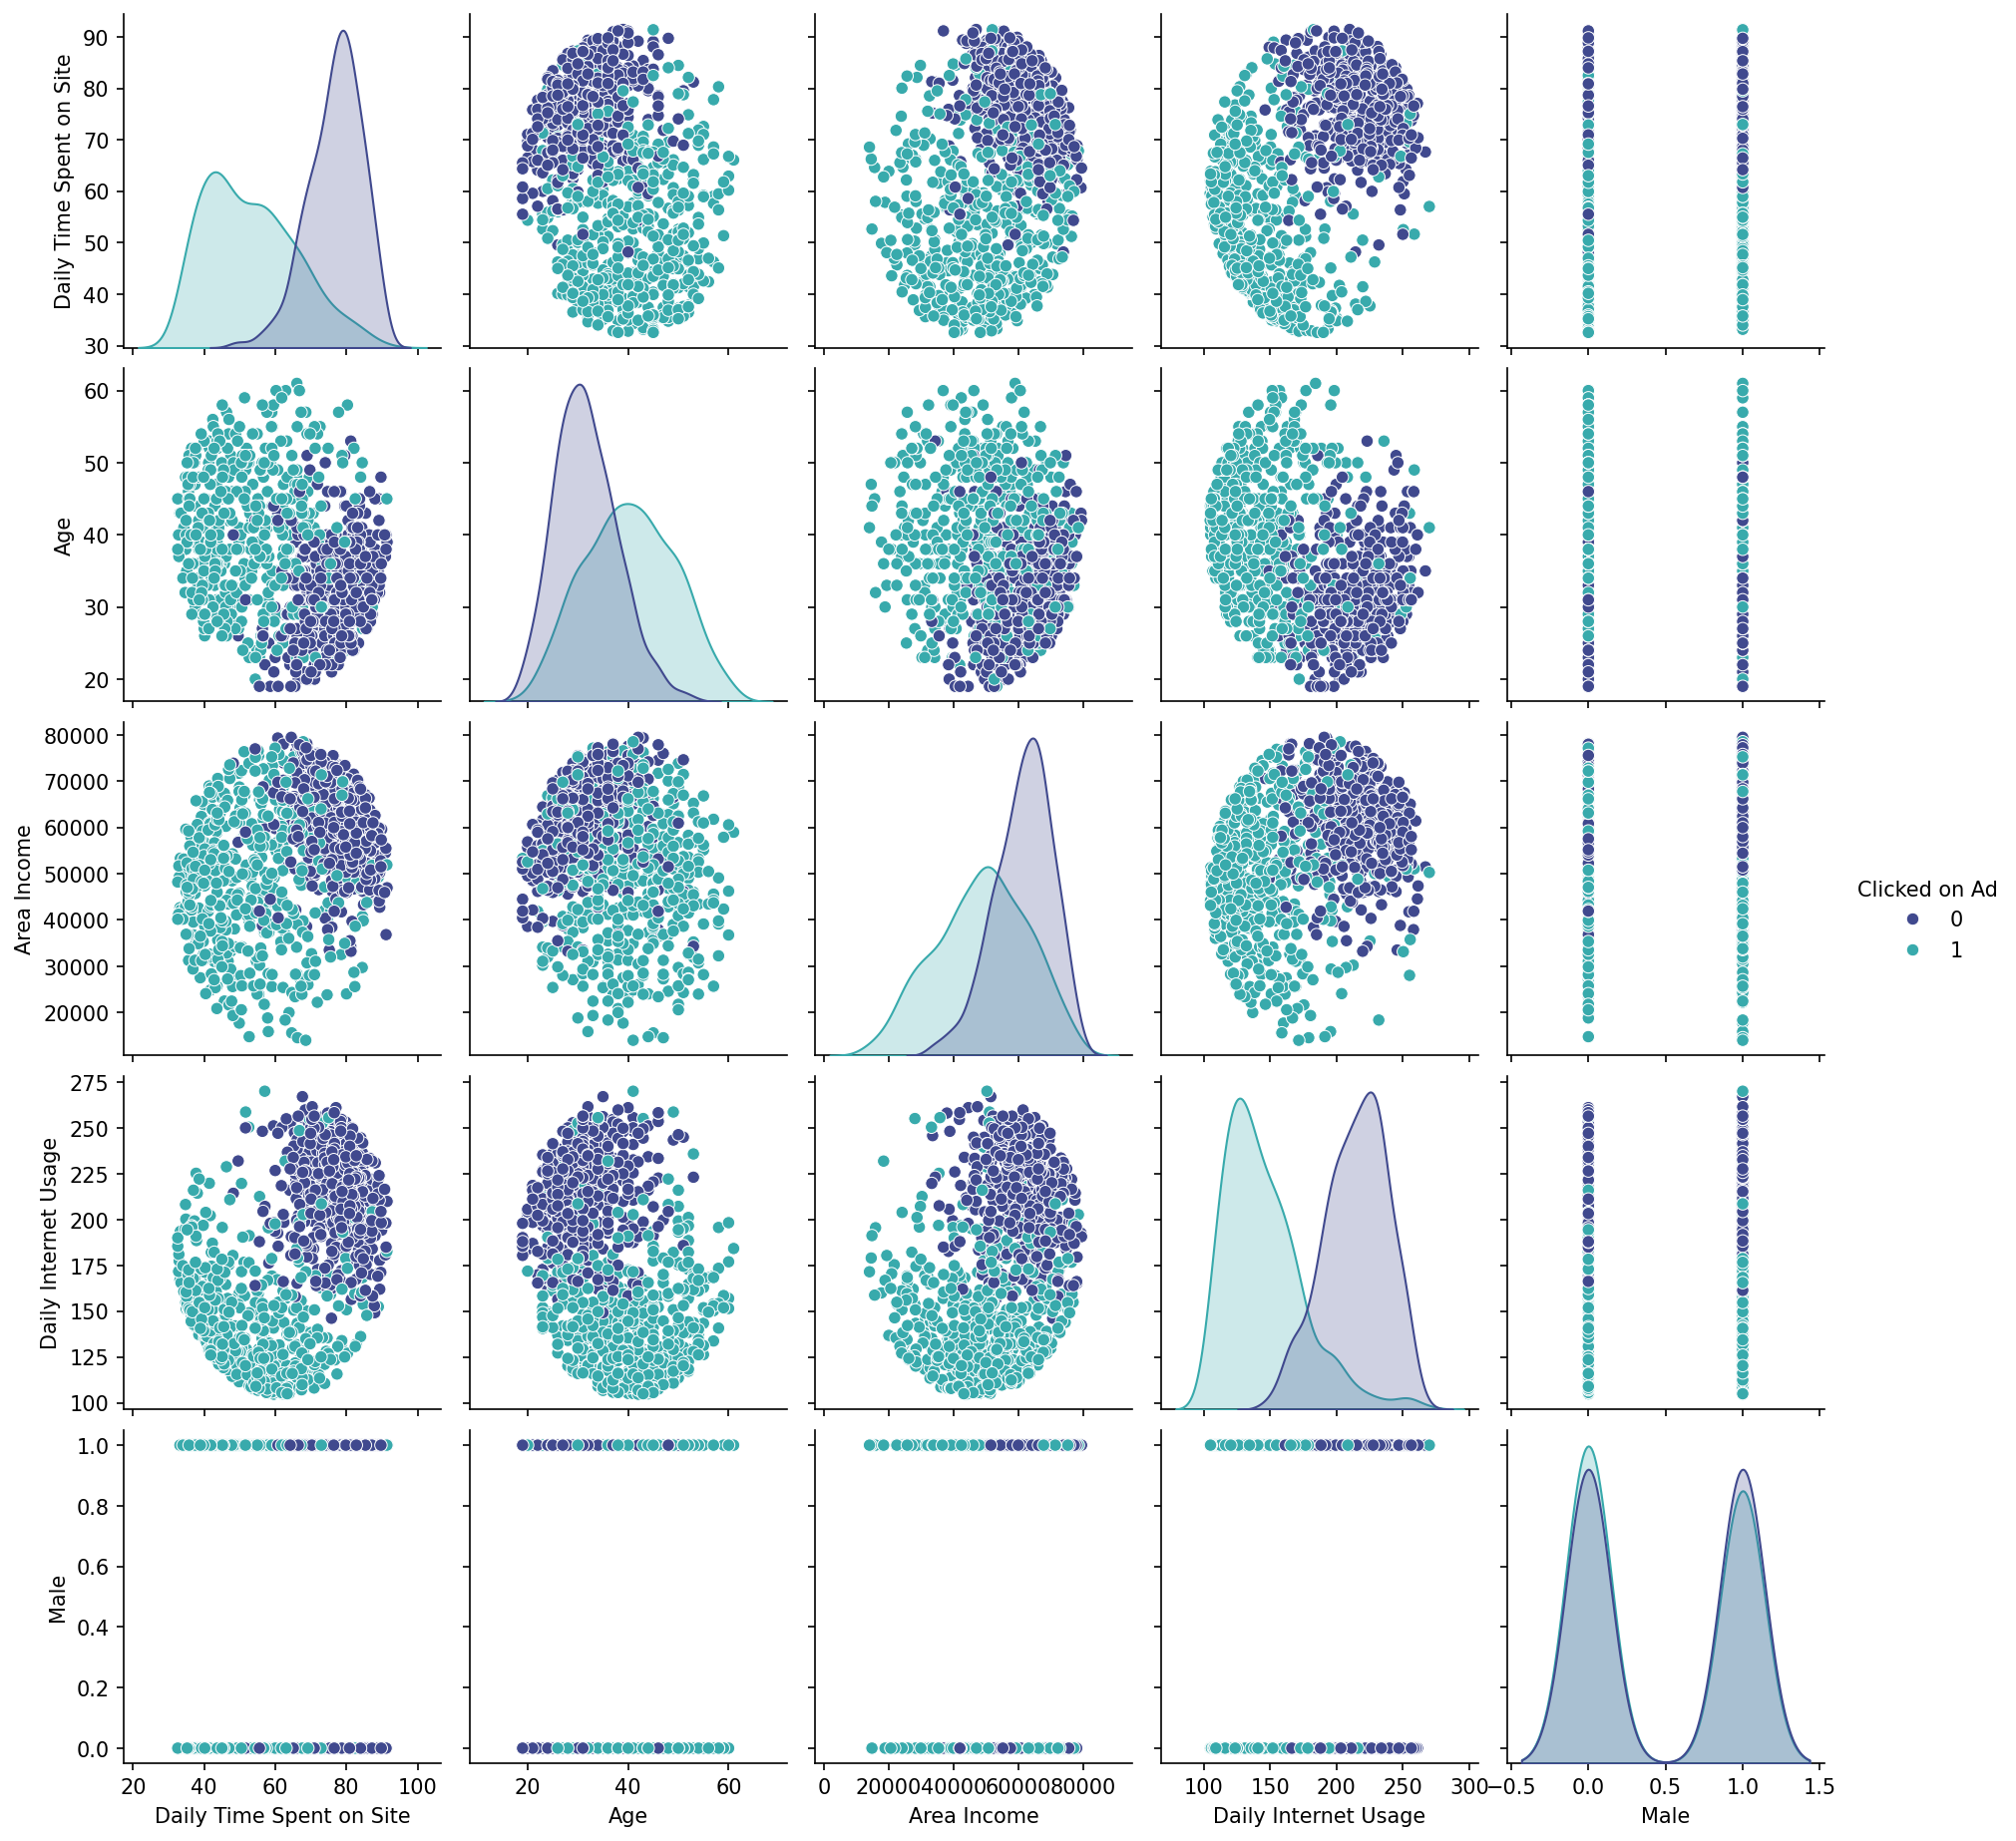

In [212]:
sns.pairplot(data = ad_data, hue = 'Clicked on Ad', palette = 'mako')

plt.show()

## Train Test Split

In [214]:
#Only utilized relevant features:
x = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']


In [215]:
from sklearn.model_selection import train_test_split

In [216]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

## Logistic Regression: Training the Model

In [218]:
from sklearn.linear_model import LogisticRegression

In [219]:
logmodel = LogisticRegression()

In [220]:
logmodel.fit(x_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions

In [222]:
predictions = logmodel.predict(x_test)

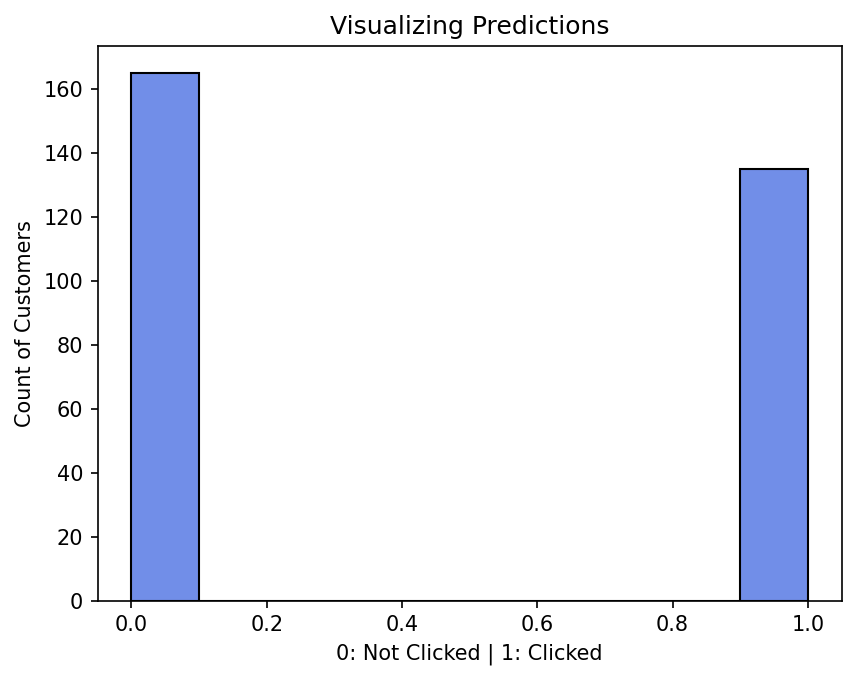

In [223]:
sns.histplot(predictions, color = 'royalblue')
plt.xlabel('0: Not Clicked | 1: Clicked')
plt.ylabel('Count of Customers')
plt.title('Visualizing Predictions')

plt.show()

## Model Evaluation

**Importing classification_report and Confusion_Matrix**

In [226]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**Classification Report:**

In [228]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



**Confusion Matrix:**

In [230]:
print(confusion_matrix(y_test, predictions))

[[140   6]
 [ 25 129]]


Here:

* TN: 140
* TP: 129
* FN: 25 (TYPE II ERROR)
* FP: 6 (TYPE I ERROR)

---